# スケールフリーネットワーク生成

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## NetworkXの組み込み関数より生成

NetworkX.barabasi_albert_graph()
Graph with 100 nodes and 384 edges
Number of nodes 100
Number of edges 384
Average degree 7.68


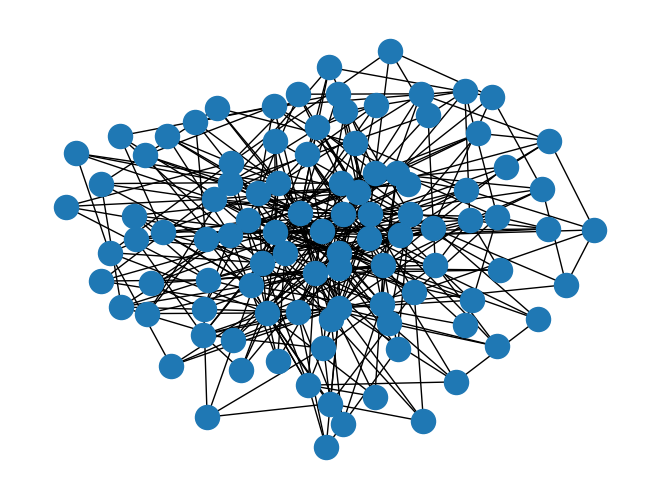

In [ ]:
n = 100
m = 4

print('NetworkX.barabasi_albert_graph()')
G1 = nx.barabasi_albert_graph(n, m)
#print(nx.info(G1))
print(G1)
print('Number of nodes', len(G1.nodes))
print('Number of edges', len(G1.edges))
print('Average degree', sum(dict(G1.degree).values()) / len(G1.nodes))

nx.draw(G1)
plt.show()

## 自作関数で生成

自作関数による生成
Graph with 100 nodes and 384 edges
Number of nodes 100
Number of edges 384
Average degree 7.68


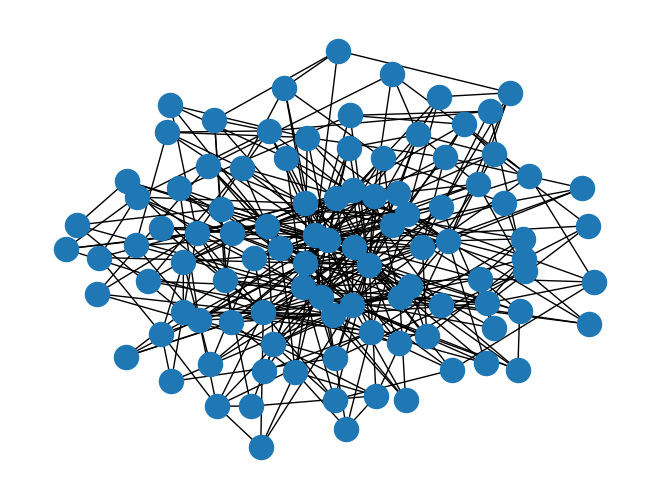

In [ ]:
# 自作のスケールフリーネットワーク生成関数
def gen_BA_network(n, m, seed=None):
    if seed is not None:
        np.random.seed(seed=seed)

    m0 = m  # 初期ノード数
    G = nx.cycle_graph(m0)  # 初期のcycleグラフを生成
    initial_edges = list(G.edges())
    node_list = list(range(m0))

    # ノードを追加し、エッジを次数に比例して追加していく
    for i in range(m0, n):
        darray = np.array(G.degree())[:,1]  # 次数の配列

        for j in range(m):
            # 次数に比例した確率ベクトルを生成
            s = np.sum(darray)
            parray = darray / s

            # 次数に比例した確率で既存のノードを選び、エッジとする
            new = np.random.choice(node_list, p=parray)
            G.add_edge(i, new)

            darray[new] = 0.

        node_list.append(i)

    G.remove_edges_from(initial_edges)
    return G

n = 100
m = 4

print('自作関数による生成')
G2 = gen_BA_network(n, m)
#print(nx.info(G2))
print(G2)
print('Number of nodes', len(G2.nodes))
print('Number of edges', len(G2.edges))
print('Average degree', sum(dict(G2.degree).values()) / len(G2.nodes))

nx.draw(G2)
plt.show()

## 次数分布のグラフ

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 43, 44, 45, 48, 49, 51, 53, 55, 58, 60, 61, 64, 65, 66, 73, 78, 86, 87, 90, 96, 111, 120, 132]
[0.317, 0.1985, 0.1315, 0.0755, 0.0595, 0.0385, 0.036, 0.017, 0.0155, 0.0165, 0.011, 0.0125, 0.008, 0.004, 0.004, 0.0025, 0.0065, 0.004, 0.0045, 0.004, 0.0005, 0.0015, 0.003, 0.002, 0.0005, 0.002, 0.0005, 0.001, 0.002, 0.0005, 0.0015, 0.0015, 0.0005, 0.0015, 0.0005, 0.0005, 0.001, 0.0005, 0.0005, 0.0005, 0.002, 0.0005, 0.0005, 0.0005, 0.001, 0.0005, 0.001, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]


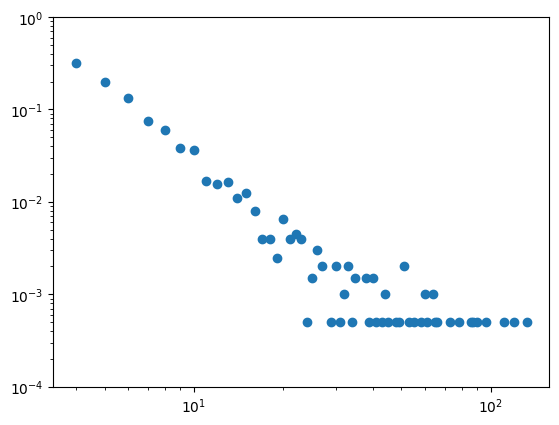

In [ ]:
n = 2000
m = 4

# スケールフリーネットワークの生成
G = nx.barabasi_albert_graph(n, m) # 組み込み関数で生成
# G = gen_BA_network(n, m) # 自作関数で生成

k = [i for i,x in enumerate(nx.degree_histogram(G)) if x != 0]
degree_dist = [i/n for i in nx.degree_histogram(G) if i != 0]
print(k)
print(degree_dist)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001,1)
plt.scatter(k, degree_dist)